# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [3]:
def predict_sex(name):
    name=str(name).split(' ')[0]
    sex_prediction = gender.Detector(case_sensitive=False)
    sex=sex_prediction.get_gender(name)
    sex_dic={'female':2,"male":1,'unknown':0,'mostly_female':-2 ,'mostly_male':-1,'andy':-3}
    return sex_dic[sex]

def creation_year(year):
    try:
        dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
        return dt.year
    except:
        return 0

def set_sex_code(x):
    x.loc[:,'sex_code']=predict_sex(x['name'])



# load data

In [3]:
data = pd.read_csv('./Data/featuresfloatv3.csv')
def extract_features(x):
    # x.loc[:,'sex_code']=x.apply(lambda row :predict_sex(row["display_name"]), axis=1)
    # print('sex code done')
    # x.loc[:,'created'] = x.apply(lambda row :creation_year(row["date_joined"]), axis=1)
    # print('created done')
    # x.loc[:,'most_recent_post'] = x.apply(lambda row :creation_year(row["most_recent_post"]), axis=1)
    # print('most_recent_post done')
    x=x.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]
    return x


In [4]:
x=extract_features(data)



scale features

In [5]:

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(x)

# Transform your data using the scaler
X_scaled = scaler.transform(x)




 Training Accuracy score: 0.9992289333578116
Testing Accuracy score: 0.8973417535614627
RandomForestClassifier score: 0.9992289333578116
classification_report 
               precision    recall  f1-score   support

         bot       0.88      0.80      0.84      2309
       human       0.90      0.95      0.92      4500

    accuracy                           0.90      6809
   macro avg       0.89      0.87      0.88      6809
weighted avg       0.90      0.90      0.90      6809



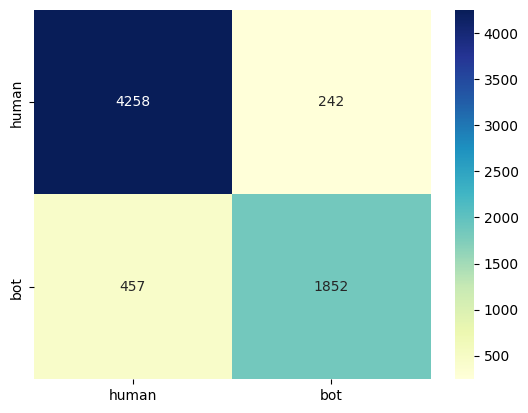

In [6]:

clf=RandomForestClassifier()
# ,'description','location','url','sex_code','verified','created','sex_code','tweet_language','tweets_by_day_of_week','tweets_by_hour_of_day'

y = data.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("RandomForestClassifier score:",clf.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test,labels=[ 'human', 'bot'])
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   



 Training Accuracy score: 0.9999632825408482
Testing Accuracy score: 0.9021882802173594
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      2309
           1       0.91      0.95      0.93      4500

    accuracy                           0.90      6809
   macro avg       0.90      0.88      0.89      6809
weighted avg       0.90      0.90      0.90      6809



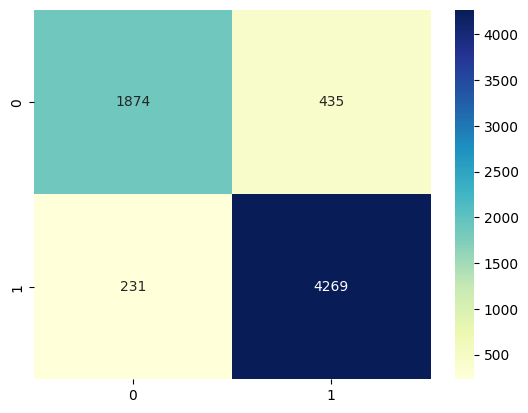

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
data = pd.read_csv('./Data/featuresfloatv3.csv')
data =data.drop('Unnamed: 0', axis=1)
# x=data.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]
x=data.iloc[:, :-1]
y = data.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

# # # scale features
# # # Create an instance of StandardScaler
# scaler = StandardScaler()
# # Fit the scaler to your data
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# sm = ADASYN(random_state=42)
# x_train,y_train = sm.fit_resample(x_train,y_train)

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)

y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [69]:
data = pd.read_csv('./Data/features+screen_name.csv')

df1=data[data.account_type== 1].head(11000)
df2=data[data.account_type== 0].head(11000)
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv('./Data/featuresfloatvf.csv', index=False)



# result

Accuracy: 88.41%

 Training Accuracy score: 0.9999431818181819
Testing Accuracy score: 0.884090909090909
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2200
           1       0.88      0.90      0.89      2200

    accuracy                           0.88      4400
   macro avg       0.88      0.88      0.88      4400
weighted avg       0.88      0.88      0.88      4400



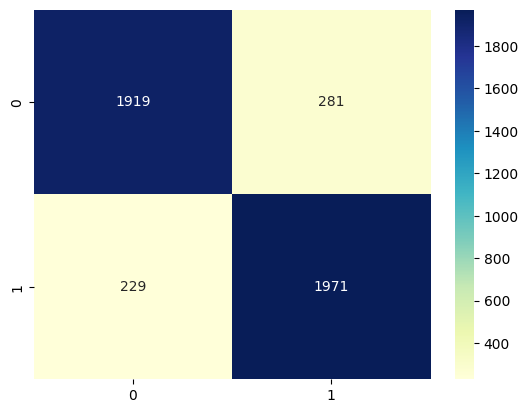

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

df = pd.read_csv('./Data/datavf.csv')

x=df.iloc[:, :-2]
y = df.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   